# Introduction

Hello, I continue to learn from where I left off. I share with you my projects in this learning path. Before I talk about this subject, I would like to give you information about this notebook that I will prepare.

My purpose of prepare this notebook is because I want to improve myself about the Pytorch and the ResNet. In this notebook, I will use two models of Deep Learning. These are the Residual neural network(ResNet) and Convolutional Neural Network(CNN). I will constitute these models with Pytorch. Firstly, I will prepare the dataset for the models. After I will visualize two images from the dataset I have prepared. After preparing the dataset, I will prepare the models with PyTorch. After I will start training with prepared models. Finally, I will visualize the results of the models. The general operation of this notebook will be like this. At the same time, We will look the difference between the results of the ResNet and CNN models.

As I mentioned earlier, I am currently on a learning path. I started this learning path with data science and then continued with machine learning and now I am learning deep learning topics. I made real a lot of projects on this learning path and I will share them in this chapter. In this learning path, I would be very happy if you would examine my notebook and help me with how to improve my notebook or what I should do in this development path. I wish you a good day and good work.

**Information about The Dataset:**
- The classification Database is divided in a Train and a Test subset.
- The Train set contains 10208 positives and 43390 negatives, while the Test set contains 5944 positives and 22050 negatives. 
- The negative samples were randomly selected from images not containing pedestrians.
- The images in the data set consist of 64x32 pixels.

![Sample Image About Dataset](https://www.researchgate.net/publication/287805480/figure/fig3/AS:668583856201745@1536414221921/Examples-from-the-Classification-Dataset-a-examples-of-pedestrians-and-b-examples.png)

- (a) Pictures with pedestrians in them.
- (b) Random pictures with no pedestrians.

My projects about Deep Learning:<br>
- [Gender Prediction With Logistic Regression](https://www.kaggle.com/code/ihsncnkz/gender-prediction-with-logistic-regression)
- [Cat And Dog Prediction With ANN](https://www.kaggle.com/code/ihsncnkz/cat-and-dog-prediction-with-ann)
- [Linear Regression With Pytorch](https://www.kaggle.com/code/ihsncnkz/linear-regression-with-pytorch)
- [My First Convolutional Neural Network(CNN) Work](https://www.kaggle.com/code/ihsncnkz/my-first-convolutional-neural-network-cnn-work)
- [Predict With CNN Model](https://www.kaggle.com/code/ihsncnkz/predict-with-cnn-model)
- [Logistic Regression, ANN And CNN With Pytorch](https://www.kaggle.com/code/ihsncnkz/logistic-regression-ann-and-cnn-with-pytorch)
- [RNN And LSTM With Keras](https://www.kaggle.com/code/ihsncnkz/rnn-and-lstm-with-keras)

My projects about Data Science and Machine Learning:
- [GPU Search](https://www.kaggle.com/code/ihsncnkz/gpu-search)
- [EDA And Linear Regression](https://www.kaggle.com/code/ihsncnkz/eda-and-linear-regression)
- [Regression Models](https://www.kaggle.com/code/ihsncnkz/regression-models)
- [Logistic Regression](https://www.kaggle.com/code/ihsncnkz/logistic-regression)
- [Classification With K-Nearest Neighbors(KNN)](https://www.kaggle.com/code/ihsncnkz/classification-with-k-nearest-neighbors-knn)
- [Classification With Support Vector Machine(SVM)](https://www.kaggle.com/code/ihsncnkz/classification-with-support-vector-machine-svm)
- [Classification With Naive Bayes Classification](https://www.kaggle.com/code/ihsncnkz/classification-with-naive-bayes-classification)
- [Decision Tree And Random Forest Classifier Models](https://www.kaggle.com/code/ihsncnkz/decision-tree-and-random-forest-classifier-models)
- [K-Means And Hierarchical Clustering With 3D Plotly](https://www.kaggle.com/code/ihsncnkz/k-means-and-hierarchical-clustering-with-3d-plotly)
- [Natural Language Process(NLP) With Naive Bayes](https://www.kaggle.com/code/ihsncnkz/natural-language-process-nlp-with-naive-bayes)
- [Recommendation System With KNN](https://www.kaggle.com/code/ihsncnkz/recommendation-system-with-knn)

# Content <a id = "cont"></a>
- [Convolutional Neural Network(CNN)](#1)
    - [Load And Prepare Dataset](#a)
        - [Load Train Negative](#a1)
        - [Load Train Positive](#a2)
        - [Concat Train](#a3)
        - [Load Test Negative](#a4)
        - [Load Test Positive](#a5)
        - [Concat Test](#a6)
        - [Create Tensor](#a7)
    - [Visualizetion](#b)
    - [Create Model ](#c)
    - [Traning Model](#d)
    - [Visualize The Results](#e)
    
    
- [Residual neural network(ResNet)](#2)
    - [Load and Prepare Dataset](#1a)
        - [Load Train Negative](#1a1)
        - [Load Train Positive](#1a2)
        - [Concat Train](#1a3)
        - [Load Test Negative](#1a4)
        - [Load Test Positive](#1a5)
        - [Concat Test](#1a6)
        - [Create Tensor](#1a7)
    - [Visualization](#2a)
    - [Create Model](#3a)
    - [Training Model](#4a)
    - [Visualize The Result](#5a)
    
    
- [CONCLUSION](#3)

In [1]:
# İmport Library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
import torch.optim as optim
from PIL import Image
import time

**Device confic Ekstra**<br>
If you want to use GPU, You apply the codes below.

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cpu


# Convolutional Neural Network(CNN) <a id = "1"></a>

**What is The Convolutional Neural Network(CNN)?**

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics.

The architecture of a ConvNet is analogous to that of the connectivity pattern of Neurons in the Human Brain and was inspired by the organization of the Visual Cortex. Individual neurons respond to stimuli only in a restricted region of the visual field known as the Receptive Field. A collection of such fields overlap to cover the entire visual area.

The more information on Convolutional Neural Network(CNN) model for [click here](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)

In this chapter, I will apply The CNN model to the dataset.

## Load And Prepare Dataset <a id = "a"></a>
[Go Content](#cont)

In this chapter, I will prepare the dataset for CNN model.<br>

**Roadmap of this chapter:**
- Firstly, I will constitute the data load function.
    - I will separate the images to array and I will put the arrays I created into the ArrayList.
- Secondly, I will constitute train and test datasets.


In [3]:
# Data Load Function
def read_images(path, numberofImage):
    array = np.zeros([numberofImage, 64*32])
    i = 0
    for img in os.listdir(path):
        img_path = path + "/" + img
        img = Image.open(img_path, mode = "r")
        data = np.asarray(img, dtype = "uint8")
        data = data.flatten()
        array[i,:] = data
        i += 1
    return array

### Load Train Negative <a id = "a1"></a>
[Go Content](#cont)

In this section, I will upload the negative images from the train folder.

In [4]:
Train_neg_path = r"../input/lsifir/LSIFIR/Classification/Train/neg"
num_Train_neg_img = 43390
Train_neg_array = read_images(Train_neg_path, num_Train_neg_img)

In [5]:
x_Train_neg_Tensor = torch.from_numpy(Train_neg_array)
print("Size of x_Train_neg_Tensor: ", x_Train_neg_Tensor.size())

# I specify negative images as zero.
y_Train_neg_Tensor = torch.zeros(num_Train_neg_img, dtype = torch.long)
print("Size of y_Train_neg_Tensor: ", y_Train_neg_Tensor.size())

Size of x_Train_neg_Tensor:  torch.Size([43390, 2048])
Size of y_Train_neg_Tensor:  torch.Size([43390])


### Load Train Positive <a id = "a2"></a>
[Go Content](#cont)

In this section, I will upload the positive images from the train folder.

In [6]:
Train_pos_path = r"../input/lsifir/LSIFIR/Classification/Train/pos"
num_Train_pos_img = 10208
Train_pos_array = read_images(Train_pos_path, num_Train_pos_img)

In [7]:
x_Train_pos_Tensor = torch.from_numpy(Train_pos_array)
print("Size of x_Train_pos_Tensor: ", x_Train_pos_Tensor.size())

# I specify positive images as one.
y_Train_pos_Tensor = torch.ones(num_Train_pos_img, dtype = torch.long)
print("Size of y_Train_pos_Tensor: ", y_Train_pos_Tensor.size())

Size of x_Train_pos_Tensor:  torch.Size([10208, 2048])
Size of y_Train_pos_Tensor:  torch.Size([10208])


### Concat Train <a id= "a3"></a>
[Go Content](#cont)

I constitute the x_train and y_train from loaded images.

In [8]:
X_train = torch.cat((x_Train_neg_Tensor, x_Train_pos_Tensor),0)
Y_train = torch.cat((y_Train_neg_Tensor, y_Train_pos_Tensor),0)

print("Size of X_train: ",X_train.size())
print("Size of Y_train: ",Y_train.size()) 

Size of X_train:  torch.Size([53598, 2048])
Size of Y_train:  torch.Size([53598])


### Load Test Negative <a id = "a4"></a>
[Go Content](#cont)

In this section, I will upload the negative images from the test folder.

In [9]:
Test_neg_path = r"../input/lsifir/LSIFIR/Classification/Test/neg"
num_Test_neg_img = 22050
Test_neg_array = read_images(Test_neg_path, num_Test_neg_img)

In [10]:
x_Test_neg_Tensor = torch.from_numpy(Test_neg_array[:20855,:])
print("Size of x_Train_neg_Tensor: ", x_Test_neg_Tensor.size())

# I specify negative images as zero.
y_Test_neg_Tensor = torch.zeros(20855, dtype = torch.long)
print("Size of y_Train_neg_Tensor: ", y_Test_neg_Tensor.size())

Size of x_Train_neg_Tensor:  torch.Size([20855, 2048])
Size of y_Train_neg_Tensor:  torch.Size([20855])


### Load Test Positive <a id="a5"></a>
[Go Content](#cont)

In this section, I will upload the positive images from the test folder.

In [11]:
Test_pos_path = r"../input/lsifir/LSIFIR/Classification/Test/pos"
num_Test_pos_img = 5944
Test_pos_array = read_images(Test_pos_path, num_Test_pos_img)

In [12]:
x_Test_pos_Tensor = torch.from_numpy(Test_pos_array)
print("Size of x_Train_neg_Tensor: ", x_Test_pos_Tensor.size())

# I specify positive images as one.
y_Test_pos_Tensor = torch.ones(num_Test_pos_img, dtype = torch.long)
print("Size of y_Train_neg_Tensor: ", y_Test_pos_Tensor.size())

Size of x_Train_neg_Tensor:  torch.Size([5944, 2048])
Size of y_Train_neg_Tensor:  torch.Size([5944])


### Concat Test <a id = "a6"></a>
[Go Content](#cont)

I constitute the x_test and y_test from loaded images.

In [13]:
X_test = torch.cat((x_Test_neg_Tensor, x_Test_pos_Tensor),0)
Y_test = torch.cat((y_Test_neg_Tensor, y_Test_pos_Tensor),0)

print("Size of X_train: ",X_test.size())
print("Size of Y_train: ",Y_test.size()) 

Size of X_train:  torch.Size([26799, 2048])
Size of Y_train:  torch.Size([26799])


### Create Tensor <a id = "a7"></a>
[Go Content](#cont)

Since I will be building my models with PyTorch, I convert train and test datasets to tensor format, which is the same as array format in PyTorch.

In [14]:
batch_size = 8933

train = torch.utils.data.TensorDataset(X_train, Y_train)
trainloader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = True)

test = torch.utils.data.TensorDataset(X_test, Y_test)
testloader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

## Visualizetion <a id = "b"></a>
[Go Content](#cont)

I will visualize two images from constituted x_test and x_train.

(-0.5, 31.5, 63.5, -0.5)

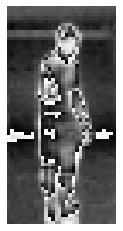

In [15]:
# Image 1 from x_train
plt.imshow(X_train[45001,:].reshape(64,32),cmap = "gray")
plt.axis("off")

(-0.5, 31.5, 63.5, -0.5)

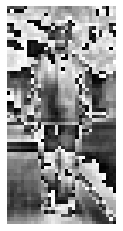

In [16]:
# Image 2 from x_test
plt.imshow(X_test[25000,:].reshape(64,32),cmap = "gray")
plt.axis("off")

## Create Model <a id = "c"></a>
[Go Content](#cont)

I will constitute the Convolutional Neural Network(CNN) model. Firstly I will specşfy hyperparameters and after create the class of the CNN model. 

In [17]:
# Hyper Parameter
numberofepochs = 10
numberofclass = 2
learning_rate = 0.00001

# Create Class
class CNNmodel(nn.Module):
    def __init__(self):
        super(CNNmodel,self).__init__()
        
        self.conv1 = nn.Conv2d(1,10,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(10,16,5)
        
        self.fc1 = nn.Linear(16*13*5,520)
        self.fc2 = nn.Linear(520,130)
        self.fc3 = nn.Linear(130,numberofclass)
        
    def forward(self, out):
        out = self.pool(F.relu((self.conv1(out))))
        out = self.pool(F.relu(self.conv2(out)))
        
        out = out.view(-1,16*13*5)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        
        return out
    
CNNmodel = CNNmodel()
# If you want to use GPU, You use the code below
# CNNmodel = CNNmodel().to(device) 

# Loss And Optimizer
cnn_criterion = nn.CrossEntropyLoss() # For calculate loss

cnn_optimizer = optim.SGD(CNNmodel.parameters(), lr = learning_rate, momentum = 0.8) # For optimize weight and bias

## Traning Model <a id = "d"></a>
[Go Content](#cont)

I will train with the prepared model.

In [18]:
# time of start
start = time.time()
cnn_train_acc = []
cnn_test_acc = []
cnn_loss_list = []

use_gpu = False # If you want to use GPU, Change True

# Training

for epoch in range(numberofepochs):
    for i, data in enumerate(trainloader, 0):
        
        inputs, labels = data
        inputs = inputs.view(batch_size, 1, 64, 32)
        inputs = inputs.float()
        
        # use gpu
        if use_gpu:
            if torch.cuda.is_available():
                inputs, labels = inputs.to(device), labels.to(device)
                
        # zero gradient
        cnn_optimizer.zero_grad()
        
        # forward
        cnn_outputs = CNNmodel(inputs)
        
        # loss
        cnn_loss = cnn_criterion(cnn_outputs, labels)
        
        # backward
        cnn_loss.backward()
        
        # update weights
        cnn_optimizer.step()
        
    # Test
    #print("Number Of Epoch: ",epoch)
    cnn_test_correct = 0
    cnn_test_total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            
            images = images.view(batch_size, 1, 64, 32)
            images = images.float()
            
            # use gpu
            if use_gpu:
                if torch.cuda.is_available():
                    images, labels = images.to(device), labels.to(device)
            
            outputs = CNNmodel(images)
            _, predicted = torch.max(outputs.data, 1)
            
            cnn_test_total += labels.size(0)
            cnn_test_correct += (predicted == labels).sum().item()
    test_acc = 100* cnn_test_correct / cnn_test_total
    #print("Accuracy Test: ",test_acc)
    cnn_test_acc.append(test_acc)
    
    # Train
    cnn_train_correct = 0
    cnn_train_total = 0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data
            
            images = images.view(batch_size, 1, 64, 32)
            images = images.float()
            
            # use gpu
            if use_gpu:
                if torch.cuda.is_available():
                    images, labels = images.to(device), labels.to(device)
            
            outputs = CNNmodel(images)
            _, predicted = torch.max(outputs.data, 1)
            
            cnn_train_total += labels.size(0)
            cnn_train_correct += (predicted == labels).sum().item()
    train_acc = 100* cnn_train_correct / cnn_train_total
    #print("Accuracy Train: ",train_acc)
    cnn_train_acc.append(train_acc)
    
    cnn_loss_list.append(cnn_loss.item())
    #print("loss: ",cnn_loss.item())
    
    print("Epoch: {} | Accuracy Train: {} | Accuracy Test: {} | Loss: {} ".format(epoch, train_acc, test_acc, cnn_loss.item()))

print("Training is Done")

# time of end
end = time.time()
process_time = (end - start)/60
print("Process Time: ",process_time)

Epoch: 0 | Accuracy Train: 77.127877905892 | Accuracy Test: 73.86842792641517 | Loss: 1.0106494426727295 
Epoch: 1 | Accuracy Train: 59.28952572857196 | Accuracy Test: 56.658830553378856 | Loss: 0.7930487990379333 
Epoch: 2 | Accuracy Train: 75.44311354901302 | Accuracy Test: 70.60711220567931 | Loss: 0.6532878875732422 
Epoch: 3 | Accuracy Train: 75.89648867495056 | Accuracy Test: 70.39814918467107 | Loss: 0.6174482107162476 
Epoch: 4 | Accuracy Train: 76.34053509459308 | Accuracy Test: 70.02126945035262 | Loss: 0.5774193406105042 
Epoch: 5 | Accuracy Train: 77.958132766148 | Accuracy Test: 71.87208477928282 | Loss: 0.5357677936553955 
Epoch: 6 | Accuracy Train: 78.76786447255495 | Accuracy Test: 72.39449233180342 | Loss: 0.5174245834350586 
Epoch: 7 | Accuracy Train: 79.48430911601179 | Accuracy Test: 72.99152953468413 | Loss: 0.48215869069099426 
Epoch: 8 | Accuracy Train: 80.23247136087167 | Accuracy Test: 73.730363073249 | Loss: 0.46834293007850647 
Epoch: 9 | Accuracy Train: 80.8

## Visualize The Results <a id = "e"></a>
[Go Content](#cont)

In this chapter, I will visualize the results of the CNN model.

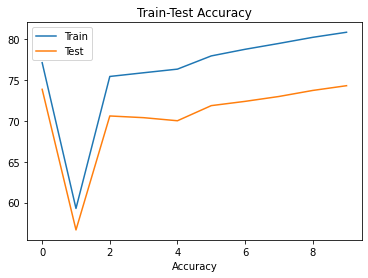

In [19]:
# Train and Test accuracy graphic
epochs = []
for i in range(numberofepochs):
    epochs.append(i)

plt.plot(epochs, cnn_train_acc, label="Train")
plt.plot(epochs, cnn_test_acc, label="Test")
plt.title("Train-Test Accuracy")
plt.xlabel("Number of Epochs")
plt.xlabel("Accuracy")
plt.legend()
plt.show()

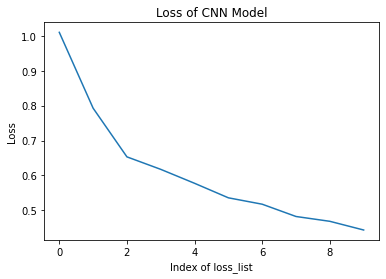

In [20]:
# Loss of cnn model graphic
plt.plot(cnn_loss_list)
plt.title("Loss of CNN Model")
plt.xlabel("Index of loss_list")
plt.ylabel("Loss")
plt.show()

# Residual neural network(ResNet) <a id = "2"></a>
[Go Content](#cont)

**What is the Residual neural network(ResNet)?**

ResNet provides an innovative solution to the vanishing gradient problem, known as “skip connections”. ResNet stacks multiple identity mappings (convolutional layers that do nothing at first), skips those layers, and reuses the activations of the previous layer. Skipping speeds up initial training by compressing the network into fewer layers. 

Then, when the network is retrained, all layers are expanded and the remaining parts of the network—known as the residual parts—are allowed to explore more of the feature space of the input image.

If you want the more information about ResNet [click here](https://datagen.tech/guides/computer-vision/resnet/)

## Load and Prepare Dataset <a id = "1a"></a>
[Go Content](#cont)

In this chapter, I will prepare the dataset for ResNet model.<br>

**Roadmap of this chapter:**
- Firstly, I will constitute the data load function.
    - I will separate the images to array and I will put the arrays I created into the ArrayList.
- Secondly, I will constitute train and test datasets.

### Load Train Negative <a id = "1a1"></a>
[Go Content](#cont)

In this section, I will upload the negative images from the train folder.

In [21]:
res_Train_neg_path = r"../input/lsifir/LSIFIR/Classification/Train/neg"
res_num_Train_neg_img = 43390
res_Train_neg_array = read_images(res_Train_neg_path, res_num_Train_neg_img)

In [22]:
x_res_Train_neg_Tensor = torch.from_numpy(res_Train_neg_array[:42000,:])
print("Size of x_Train_neg_Tensor: ", x_res_Train_neg_Tensor.size())

# I specify negative images as zero.
y_res_Train_neg_Tensor = torch.zeros(42000, dtype = torch.long)
print("Size of y_Train_neg_Tensor: ", y_res_Train_neg_Tensor.size())

Size of x_Train_neg_Tensor:  torch.Size([42000, 2048])
Size of y_Train_neg_Tensor:  torch.Size([42000])


### Load Train Positive <a id = "1a2"></a>
[Go Content](#cont)

In this section, I will upload the positive images from the train folder.

In [23]:
res_Train_pos_path = r"../input/lsifir/LSIFIR/Classification/Train/pos"
res_num_Train_pos_img = 10208
res_Train_pos_array = read_images(res_Train_pos_path, res_num_Train_pos_img)

In [24]:
x_res_Train_pos_Tensor = torch.from_numpy(res_Train_pos_array[:10000,:])
print("Size of x_Train_pos_Tensor: ", x_res_Train_pos_Tensor.size())

# I specify negative images as one.
y_res_Train_pos_Tensor = torch.ones(10000, dtype = torch.long)
print("Size of y_Train_pos_Tensor: ", y_res_Train_pos_Tensor.size())

Size of x_Train_pos_Tensor:  torch.Size([10000, 2048])
Size of y_Train_pos_Tensor:  torch.Size([10000])


### Concat Train <a id = "1a3"></a>
[Go Content](#cont)

I constitute the x_train and y_train from loaded images.

In [25]:
X_res_train = torch.cat((x_res_Train_neg_Tensor, x_res_Train_pos_Tensor),0)
Y_res_train = torch.cat((y_res_Train_neg_Tensor, y_res_Train_pos_Tensor),0)

print("Size of X_train: ",X_res_train.size())
print("Size of Y_train: ",Y_res_train.size()) 

Size of X_train:  torch.Size([52000, 2048])
Size of Y_train:  torch.Size([52000])


### Load Test Negative <a id = "1a4"></a>
[Go Content](#cont)

In this section, I will upload the negative images from the test folder.

In [26]:
res_Test_neg_path = r"../input/lsifir/LSIFIR/Classification/Test/neg"
res_num_Test_neg_img = 22050
res_Test_neg_array = read_images(res_Test_neg_path, res_num_Test_neg_img)

In [27]:
x_res_Test_neg_Tensor = torch.from_numpy(res_Test_neg_array[:18056,:])
print("Size of x_Train_neg_Tensor: ", x_res_Test_neg_Tensor.size())

# I specify negative images as zero.
y_res_Test_neg_Tensor = torch.zeros(18056, dtype = torch.long)
print("Size of y_Train_neg_Tensor: ", y_res_Test_neg_Tensor.size())

Size of x_Train_neg_Tensor:  torch.Size([18056, 2048])
Size of y_Train_neg_Tensor:  torch.Size([18056])


### Load Test Positive <a id = "1a5"></a>
[Go Content](#cont)

In this section, I will upload the positive images from the test folder.

In [28]:
res_Test_pos_path = r"../input/lsifir/LSIFIR/Classification/Test/pos"
res_num_Test_pos_img = 5944
res_Test_pos_array = read_images(res_Test_pos_path, res_num_Test_pos_img)

In [29]:
x_res_Test_pos_Tensor = torch.from_numpy(res_Test_pos_array)
print("Size of x_Train_neg_Tensor: ", x_res_Test_pos_Tensor.size())

# I specify negative images as one.
y_res_Test_pos_Tensor = torch.ones(res_num_Test_pos_img, dtype = torch.long)
print("Size of y_Train_neg_Tensor: ", y_res_Test_pos_Tensor.size())

Size of x_Train_neg_Tensor:  torch.Size([5944, 2048])
Size of y_Train_neg_Tensor:  torch.Size([5944])


### Concat Test <a id = "1a6"></a>
[Go Content](#cont)

I constitute the x_test and y_test from loaded images.

In [30]:
X_res_test = torch.cat((x_res_Test_neg_Tensor, x_res_Test_pos_Tensor),0)
Y_res_test = torch.cat((y_res_Test_neg_Tensor, y_res_Test_pos_Tensor),0)

print("Size of X_train: ",X_res_test.size())
print("Size of Y_train: ",Y_res_test.size()) 

Size of X_train:  torch.Size([24000, 2048])
Size of Y_train:  torch.Size([24000])


### Create Tensor<a id = "1a7"></a>
[Go Content](#cont)

Since I will be building my models with PyTorch, I convert train and test datasets to tensor format, which is the same as array format in PyTorch.

In [31]:
res_batch_size = 2000

# Last prepare data
res_train = torch.utils.data.TensorDataset(X_res_train, Y_res_train)
res_trainloader = torch.utils.data.DataLoader(res_train, batch_size = res_batch_size, shuffle = True)

res_test = torch.utils.data.TensorDataset(X_res_test, Y_res_test)
res_testloader = torch.utils.data.DataLoader(res_test, batch_size = res_batch_size, shuffle = False)

## Visualization <a id = "2a"></a>
[Go Content](#cont)

In this chapter, I will visualize two images from constituted x_test and x_train.

(-0.5, 31.5, 63.5, -0.5)

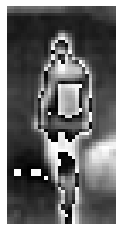

In [32]:
# Image from x_res_train
plt.imshow(X_res_train[45001,:].reshape(64,32),cmap = "gray")
plt.axis("off")

(-0.5, 31.5, 63.5, -0.5)

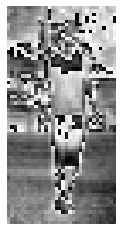

In [33]:
# Image from X_res_test
plt.imshow(X_res_test[20000,:].reshape(64,32),cmap = "gray")
plt.axis("off")

## Create Model <a id = "3a"></a>
[Go Content](#cont)

In this chapter, I will create the ResNet model.

In [34]:
# Hyper Parameters
res_numberofepochs = 10
res_numberofclasses = 2
res_learning_rate = 0.0001

def conv3x3(in_planes, out_planes, stride = 1):
    return nn.Conv2d(in_planes, out_planes, kernel_size = 3, stride = stride, padding = 1, bias = False)

def conv1x1(in_planes, out_planes, stride = 1):
    return nn.Conv2d(in_planes, out_planes, kernel_size = 1, stride = stride, bias = False)

In the below code, I will create the basic block of ResNet.

A basic ResNet block is composed by two layers of 3x3 conv/batchnorm/relu. In the picture, the lines represent the residual operation. The dotted line means that the shortcut was applied to match the input and the output dimension.

![Basic Block](https://miro.medium.com/max/235/1*E6ptpDYIVmdlJO6hC-KzCQ.png)

If you want more information about this topic(basic block and other topics of Resnet) [click here](https://medium.com/towards-data-science/residual-network-implementing-resnet-a7da63c7b278)

In the code above, I created the neural networks that I will use in the basic block.

In [35]:
# Create Class
class ResNetBasicBlock(nn.Module):
    
    expansion = 1
    
    def __init__(self, inplanes, planes, stride = 1, downsample = None):
        super(ResNetBasicBlock,self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace = True)
        self.drop = nn.Dropout(0.9)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride
        
    def forward(self, x):
        identity = x
        
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.drop(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.drop(out)
        
        if self.downsample is not None:
            identity = self.downsample(x)
        out = out + identity
        out = self.relu(out)
        return out

In the below code, I will create the general ResNet Model.

In [36]:
class ResNet(nn.Module):
    
    def __init__(self, block, layers, num_classes = res_numberofclasses):
        super(ResNet, self).__init__()
        self.inplanes = 64
        self.conv1 = nn.Conv2d(1, 64, kernel_size = 7, stride = 2, padding = 3, bias = False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace = True)
        self.maxpool = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)
        self.layer1 = self._make_layer(block, 64, layers[0], stride = 1)
        self.layer2 = self._make_layer(block, 128, layers[1], stride = 2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride = 2)
        
        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(256*block.expansion, res_numberofclasses)
        
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode = "fan_out", nonlinearity = "relu")
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
                
    
    def _make_layer(self, block, planes, blocks, stride = 1):
        downsample = None
        
        if stride != 1 or self.inplanes != planes*block.expansion:
            downsample = nn.Sequential(conv1x1(self.inplanes, planes * block.expansion, stride),
                                      nn.BatchNorm2d(planes*block.expansion))
            
        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes*block.expansion
        for _ in range(1,blocks):
            layers.append(block(self.inplanes, planes))
            
        return nn.Sequential(*layers)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        
        return x
    
res_model = ResNet(ResNetBasicBlock, [2,2,2])

# For GPU
# res_model = ResNet(ResNetBasicBlock, [2,2,2]).to(device)

res_criterion = nn.CrossEntropyLoss()

res_optimizer = torch.optim.Adam(res_model.parameters(), lr = res_learning_rate)

## Training Model <a id= "4a"></a>
[Go Content](#cont)

In this chapter, I will train with the prepared ResNet Model.

In [37]:
res_start = time.time() # start of time
res_train_acc = []
res_test_acc = []
res_loss_list = []

use_gpu = False # If you want to use GPU, Change True

res_total_step = len(res_trainloader)

for epoch in range(res_numberofepochs):
    for i, (images, labels) in enumerate(res_trainloader):
        
        images = images.view(res_batch_size, 1, 64, 32)
        images = images.float()
        
        # GPU
        if use_gpu:
            if torch.cuda.is_available():
                images, labels = images.to(device), labels.to(device)
                
        outputs = res_model(images)
        
        loss = res_criterion(outputs, labels)
        
        # backward and optimization
        res_optimizer.zero_grad()
        loss.backward()
        res_optimizer.step()
        """
        if i % 2 == 0:
            print("epoch: {} {}\{}".format(epoch, i, res_total_step))
        """ 
    # train
    res_train_correct = 0
    res_train_total = 0
    with torch.no_grad():
        for data in res_trainloader:
            images, labels = data
            images = images.view(res_batch_size, 1, 64, 32)
            images = images.float()
            
            # GPU
            if use_gpu:
                if torch.cuda.is_available():
                    images, labels = images.to(device), labels.to(device)
                    
            outputs = res_model(images)
            _, predicted = torch.max(outputs.data, 1)
            res_train_total += labels.size(0)
            res_train_correct += (predicted == labels).sum().item()
            
    Accuracy_Train = 100* res_train_correct/res_train_total
    #print("Accuracy Train: "(Accuracy_Train)
    res_train_acc.append(Accuracy_Train)
    
    # test
    res_test_correct = 0
    res_test_total = 0
    with torch.no_grad():
        for data in res_testloader:
            images, labels = data
            images = images.view(res_batch_size, 1, 64, 32)
            images = images.float()
            
            # GPU
            if use_gpu:
                if torch.cuda.is_available():
                    images, labels = images.to(device), labels.to(device)
                    
            outputs = res_model(images)
            _, predicted = torch.max(outputs.data, 1)
            res_test_total += labels.size(0)
            res_test_correct += (predicted == labels).sum().item()
          
    Accuracy_Test = 100* res_test_correct/res_test_total
    #print("Accuracy Test: "(Accuracy_Test)
    res_test_acc.append(Accuracy_Test)
    
    res_loss_list.append(loss.item())
          
    print("Epoch: {} | Accuracy Train: {} | Accuracy Test: {} | Loss: {} ".format(epoch, Accuracy_Train, Accuracy_Test, loss.item()))
    
print("Training is Done")

# time of end
res_end = time.time()
res_process_time = (res_end - res_start)/60
print("Process Time: ",res_process_time)

Epoch: 0 | Accuracy Train: 69.12307692307692 | Accuracy Test: 65.04583333333333 | Loss: 0.6256431937217712 
Epoch: 1 | Accuracy Train: 78.00961538461539 | Accuracy Test: 73.22916666666667 | Loss: 0.5408258438110352 
Epoch: 2 | Accuracy Train: 79.23846153846154 | Accuracy Test: 73.85833333333333 | Loss: 0.5148367881774902 
Epoch: 3 | Accuracy Train: 79.54230769230769 | Accuracy Test: 74.26666666666667 | Loss: 0.5131917595863342 
Epoch: 4 | Accuracy Train: 80.08269230769231 | Accuracy Test: 73.67916666666666 | Loss: 0.45688408613204956 
Epoch: 5 | Accuracy Train: 80.05961538461538 | Accuracy Test: 69.8625 | Loss: 0.38981539011001587 
Epoch: 6 | Accuracy Train: 80.94038461538462 | Accuracy Test: 69.075 | Loss: 0.35155728459358215 
Epoch: 7 | Accuracy Train: 83.30961538461538 | Accuracy Test: 69.07083333333334 | Loss: 0.3407168984413147 
Epoch: 8 | Accuracy Train: 84.31346153846154 | Accuracy Test: 68.425 | Loss: 0.32696834206581116 
Epoch: 9 | Accuracy Train: 85.70961538461539 | Accuracy 

## Visualize The Result <a id = "5a"></a>
[Go Content](#cont)

In this chapter, I will visualize the results of ResNet Model.

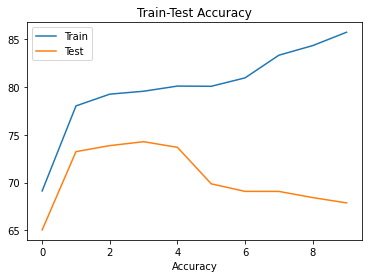

In [38]:
# Train and Test accuracy graphic
res_epochs = []
for i in range(res_numberofepochs):
    res_epochs.append(i)

plt.plot(res_epochs, res_train_acc, label="Train")
plt.plot(res_epochs, res_test_acc, label="Test")
plt.title("Train-Test Accuracy")
plt.xlabel("Number of Epochs")
plt.xlabel("Accuracy")
plt.legend()
plt.show()


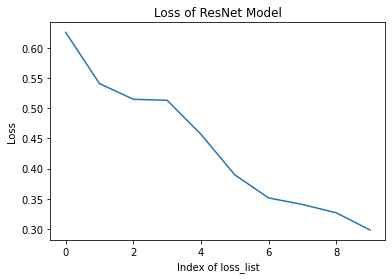

In [39]:
# Loss of cnn model graphic
plt.plot(res_loss_list)
plt.title("Loss of ResNet Model")
plt.xlabel("Index of loss_list")
plt.ylabel("Loss")
plt.show()

# CONCLUSION <a id = "3"></a>
---
[Go Content](#cont)

I am learning the English language newly if I make an errata please advise me in the comment. Thank you for reading my notebook, your votes and your comments. I will be waiting for your advice.

In this notebook, I made to train with ten-step because I used CPU. Training with CPU takes too long but I will make a project with GPU.